### Project Overview
The objective is to build a **deep learning classification model** that predicts whether an **Initial Public Offering (IPO)** in the Indian market will result in **listing gains** — the percentage increase in share price from the issue price on the day of listing.  
The context is an investment firm evaluating potential IPO opportunities.

### Dataset
- Source: **Moneycontrol**  
- Contains historical information on IPOs in the Indian market.

### Workflow
1. **Exploratory Data Analysis (EDA)**  
2. **Data Visualization** of important variables  
3. **Deep Learning Classification Model** using TensorFlow/Keras

## Dataset Description

The dataset contains the following columns:

- **Date**: Date when the IPO was listed  
- **IPOName**: Name of the IPO  
- **Issue_Size**: Size of the IPO issue (INR Crores)  
- **Subscription_QIB**: Number of times subscribed by Qualified Institutional Buyers (QIB)  
- **Subscription_HNI**: Number of times subscribed by High Networth Individuals (HNI)  
- **Subscription_RII**: Number of times subscribed by Retail Individual Investors (RII)  
- **Subscription_Total**: Total number of times the IPO was subscribed  
- **Issue_Price**: Price in INR at which the IPO was issued  
- **Listing_Gains_Percent**: Percentage gain in the listing price over the issue price

In [47]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [13]:
df = pd.read_csv("Indian_IPO_Market_Data.csv")

In [15]:
df.head()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
0,03/02/10,Infinite Comp,189.80,48.44,106.02,11.08,43.22,165,11.82
1,08/02/10,Jubilant Food,328.70,59.39,51.95,3.79,31.11,145,-84.21
2,15/02/10,Syncom Health,56.25,0.99,16.60,6.25,5.17,75,17.13
3,15/02/10,Vascon Engineer,199.80,1.12,3.65,0.62,1.22,165,-11.28
4,19/02/10,Thangamayil,0.00,0.52,1.52,2.26,1.12,75,-5.20


In [17]:
df.tail()

,Date,IPOName,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
314,26/08/22,Syrma SGS,840.13,42.42,7.13,2.84,15.59,220,42.30
315,06/09/22,Dreamfolks Serv,562.10,27.48,14.18,24.19,23.25,326,41.92
316,15/09/22,TMB,792.00,0.51,1.77,3.44,1.39,525,-3.15
317,26/09/22,Harsha Engineer,755.00,113.82,40.36,12.44,47.19,330,47.24
318,17/10/22,Electronics Mar,500.00,58.81,15.39,8.27,24.23,59,43.14


In [19]:
df.shape

(319, 9)

In [21]:
df["Listing_Gains_Percent"].describe()

count    319.000000
mean       4.742696
std       47.650946
min      -97.150000
25%      -11.555000
50%        1.810000
75%       25.310000
max      270.400000
Name: Listing_Gains_Percent, dtype: float64

In [23]:
df.describe()

,Issue_Size,Subscription_QIB,Subscription_HNI,Subscription_RII,Subscription_Total,Issue_Price,Listing_Gains_Percent
count,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000,319.000000
mean,1192.859969,25.684138,70.091379,8.561599,27.447147,375.128527,4.742696
std,2384.643786,40.716782,142.454416,14.508670,48.772203,353.897614,47.650946
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-97.150000
25%,169.005000,1.150000,1.255000,1.275000,1.645000,119.000000,-11.555000
50%,496.250000,4.940000,5.070000,3.420000,4.930000,250.000000,1.810000
75%,1100.000000,34.635000,62.095000,8.605000,33.395000,536.000000,25.310000
max,21000.000000,215.450000,958.070000,119.440000,326.490000,2150.000000,270.400000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   319 non-null    object 
 1   IPOName                319 non-null    object 
 2   Issue_Size             319 non-null    float64
 3   Subscription_QIB       319 non-null    float64
 4   Subscription_HNI       319 non-null    float64
 5   Subscription_RII       319 non-null    float64
 6   Subscription_Total     319 non-null    float64
 7   Issue_Price            319 non-null    int64  
 8   Listing_Gains_Percent  319 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 22.6+ KB


In [27]:
df["Listing_Gains_Profit"] = df["Listing_Gains_Percent"].apply(lambda x: 1 if x > 0 else 0)

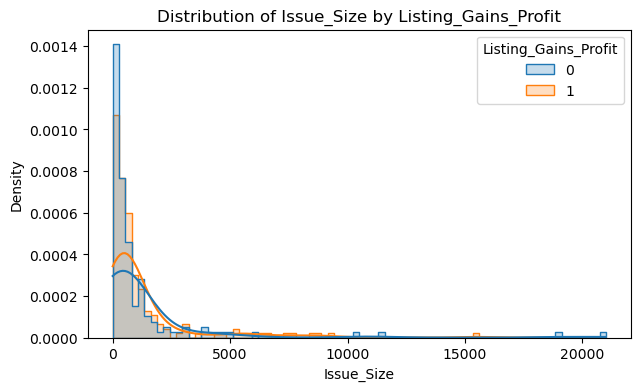

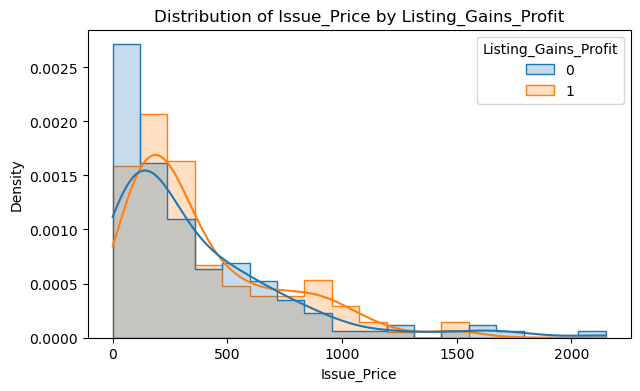

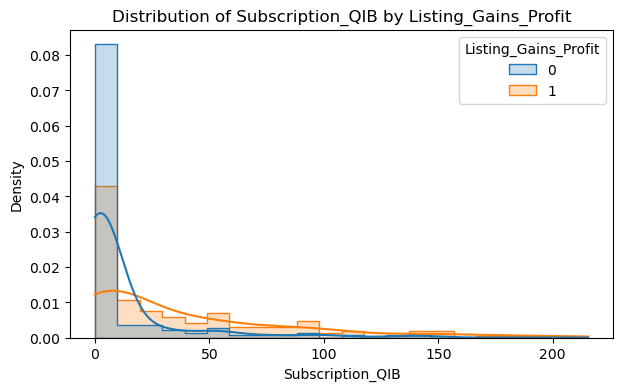

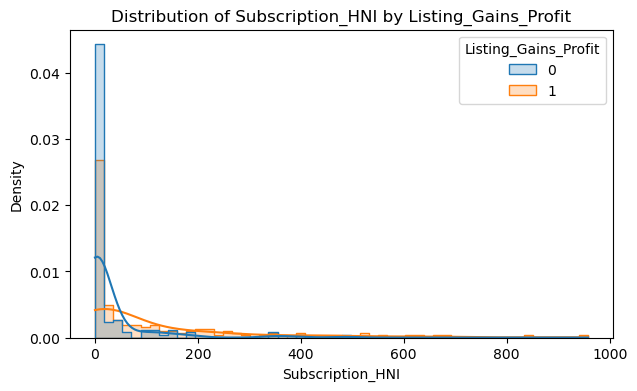

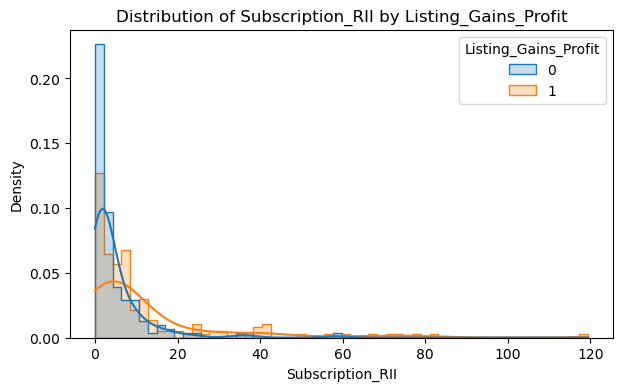

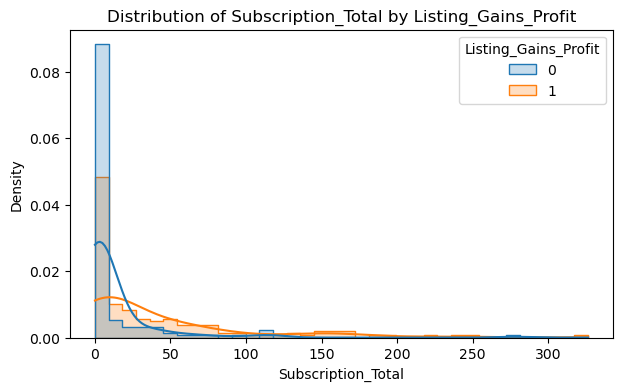

In [29]:
features = ["Issue_Size", "Issue_Price", "Subscription_QIB", 
            "Subscription_HNI", "Subscription_RII", "Subscription_Total"]

for col in features:
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Listing_Gains_Profit", 
                 kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Distribution of {col} by Listing_Gains_Profit")
    plt.show()

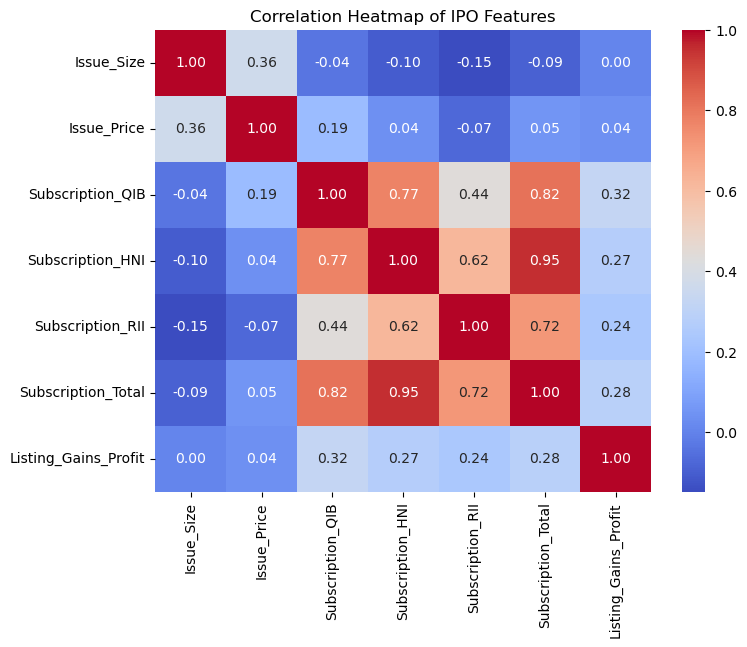

In [31]:
corr_features = ["Issue_Size", "Issue_Price", "Subscription_QIB", 
                 "Subscription_HNI", "Subscription_RII", "Subscription_Total", 
                 "Listing_Gains_Profit"]

corr = df[corr_features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of IPO Features")
plt.show()

## Correlation Analysis

A correlation heatmap was created to understand the relationships between features and the target variable `Listing_Gains_Profit`.

### Key Findings
- **Strongest correlations with target**:  
  - `Subscription_QIB` (0.32)  
  - `Subscription_Total` (0.28)  
  - `Subscription_HNI` (0.27)  
  - `Subscription_RII` (0.24)  
- **Weak/no correlation with target**:  
  - `Issue_Size` (0.00)  
  - `Issue_Price` (0.04)  

### Multicollinearity
- `Subscription_Total` is highly correlated with `Subscription_HNI` (0.95) and `Subscription_QIB` (0.82).  
- To reduce redundancy, `Subscription_Total` was excluded and only the individual subscription categories were retained.

### Selected Features for Modeling
- `Subscription_QIB`  
- `Subscription_HNI`  
- `Subscription_RII`


In [34]:
print(df["Listing_Gains_Profit"].value_counts(normalize=True) * 100)

Listing_Gains_Profit
1    54.545455
0    45.454545
Name: proportion, dtype: float64


### Target Variable Interpretation
The dataset is relatively balanced, with a slight majority of IPOs resulting in listing gains.  
This balance ensures that the classification model will not be heavily biased toward one class.

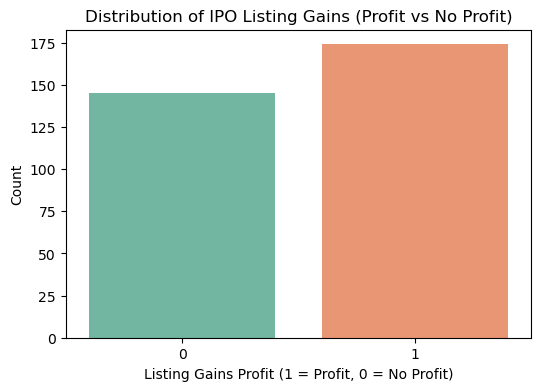

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(
    x="Listing_Gains_Profit", 
    data=df, 
    hue="Listing_Gains_Profit",  
    palette="Set2", 
    legend=False                  
)

plt.title("Distribution of IPO Listing Gains (Profit vs No Profit)")
plt.xlabel("Listing Gains Profit (1 = Profit, 0 = No Profit)")
plt.ylabel("Count")
plt.show()

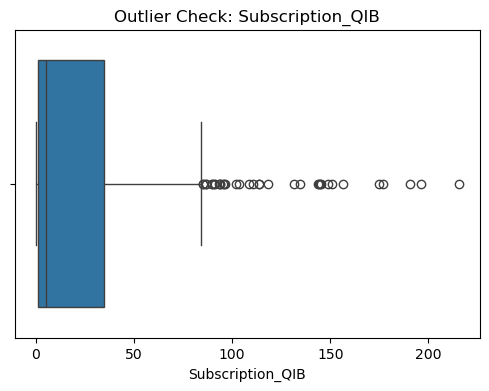

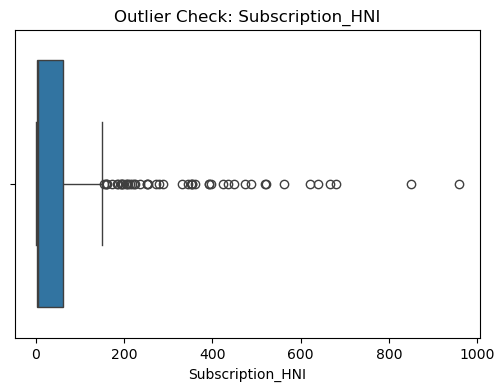

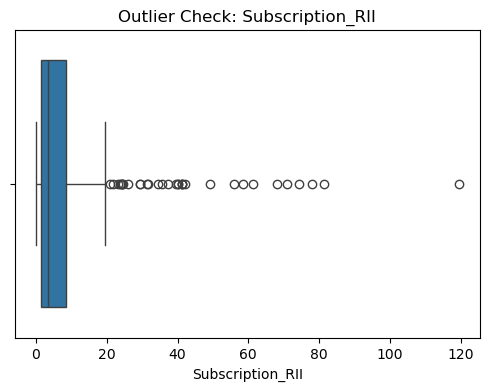

In [39]:
selected_features = ["Subscription_QIB", "Subscription_HNI", "Subscription_RII"]

for col in selected_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check: {col}")
    plt.show()

### Outlier Analysis and Handling

Boxplot analysis of the selected features (`Subscription_QIB`, `Subscription_HNI`, `Subscription_RII`) indicated the presence of outliers.  
In the context of IPO data, such outliers are not errors but reflect genuine cases of unusually high investor demand.

### Approach
- Outliers were **retained** to preserve valuable information.  
- To reduce the influence of extreme values on model training, **Robust Scaling** (or log transformation if required) was applied to normalize feature ranges.  

This ensures that the model can learn from extreme subscription levels without being dominated by them.


In [43]:
from sklearn.preprocessing import RobustScaler

selected_features = ["Subscription_QIB", "Subscription_HNI", "Subscription_RII"]

scaler = RobustScaler()

df[selected_features] = scaler.fit_transform(df[selected_features])

In [53]:
y = df["Listing_Gains_Profit"].values

X = df[["Subscription_QIB", "Subscription_HNI", "Subscription_RII", "Issue_Price", "Issue_Size"]].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Min values (per feature):", X_scaled.min(axis=0))
print("Max values (per feature):", X_scaled.max(axis=0))
print("Mean values (per feature):", X_scaled.mean(axis=0))

Min values (per feature): [0. 0. 0. 0. 0.]
Max values (per feature): [1. 1. 1. 1. 1.]
Mean values (per feature): [0.11921159 0.07315893 0.07168117 0.17447838 0.05680286]


### Data Preparation and Normalization

The modeling stage required the definition of the target and predictor variables, followed by normalization:

- **Target Variable**: `Listing_Gains_Profit`, a binary indicator of whether the IPO generated listing gains.  
- **Predictor Variables**: `Subscription_QIB`, `Subscription_HNI`, `Subscription_RII`, `Issue_Price`, and `Issue_Size`.  
- **Normalization**: Applied Min-Max scaling to rescale all predictor values into the range [0, 1].  
- **Validation**: Summary statistics confirmed that the minimum and maximum values of each feature fall within 0 and 1, ensuring successful normalization.  

This normalization step ensures that features with larger numerical scales do not dominate the learning process in the neural network.

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

print("\nTarget distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nTarget distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True))

Training set shape: (255, 5) (255,)
Test set shape: (64, 5) (64,)

Target distribution in training set:
1    0.545098
0    0.454902
Name: proportion, dtype: float64

Target distribution in test set:
1    0.546875
0    0.453125
Name: proportion, dtype: float64


In [74]:
input_layer = layers.Input(shape=(X_train.shape[1],))

hidden1 = layers.Dense(64, activation='relu')(input_layer)
hidden1 = layers.BatchNormalization()(hidden1)
hidden1 = layers.Dropout(0.2)(hidden1)

hidden2 = layers.Dense(32, activation='relu')(hidden1)
hidden2 = layers.BatchNormalization()(hidden2)
hidden2 = layers.Dropout(0.1)(hidden2)

output_layer = layers.Dense(1, activation='sigmoid')(hidden2)

model = models.Model(inputs=input_layer, outputs=output_layer)

In [76]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  
    loss='binary_crossentropy', 
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')] 
)

In [78]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4391 - auc: 0.4769 - loss: 1.0289 - val_accuracy: 0.5469 - val_auc: 0.5517 - val_loss: 1.6109
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5577 - auc: 0.5619 - loss: 0.8171 - val_accuracy: 0.4688 - val_auc: 0.5079 - val_loss: 1.0622
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5152 - auc: 0.5084 - loss: 0.8547 - val_accuracy: 0.4531 - val_auc: 0.4581 - val_loss: 0.7887
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4996 - auc: 0.5150 - loss: 0.7584 - val_accuracy: 0.4844 - val_auc: 0.4118 - val_loss: 0.7570
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5352 - auc: 0.5133 - loss: 0.7271 - val_accuracy: 0.4844 - val_auc: 0.4044 - val_loss: 0.7368
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5431 - auc: 0.5634 - loss: 0.7669 - val_accuracy: 0.5156 - val_auc: 0.4064 - val_loss: 0.7351
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6